## 21D008 Probabilistic Inference - Project: Elliptical Slice Sampling in Classification

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal as mn
from gpc import *
from utils import (
    plot_sampler,
    plot_multiple,
    plot_contour,
    plot_ESS,
    gaussian_kernel
)
np.random.seed(30)
cmap=colors.ListedColormap(["tab:cyan", "tab:green", "tab:gray"])

In [2]:
prior_µ = np.array([1,2])
prior_Σ = np.array(
    [[ 2.58319407, -0.67001488],
    [-0.67001488,  1.09846023]]
)

lik_µ = np.array([0,0])
lik_Σ = np.array(
    [[ 1.80406008, -1.01247719],
    [-1.01247719,  1.34016259]]
)

loglik = lambda f: np.log(multivariate_normal.pdf(f, mean=prior_µ, cov=prior_Σ))
f_incumbent = (mn(prior_µ - prior_µ, prior_Σ, size=1)).squeeze()

In [3]:
nu = mn(prior_µ - prior_µ, prior_Σ, size=1)
log_y = loglik(f_incumbent) + np.log(np.random.uniform(0,1))
Θ = np.random.uniform(0 + sys.float_info.min, 2*np.pi)
Θ_min, Θ_max = Θ - 2*np.pi, Θ

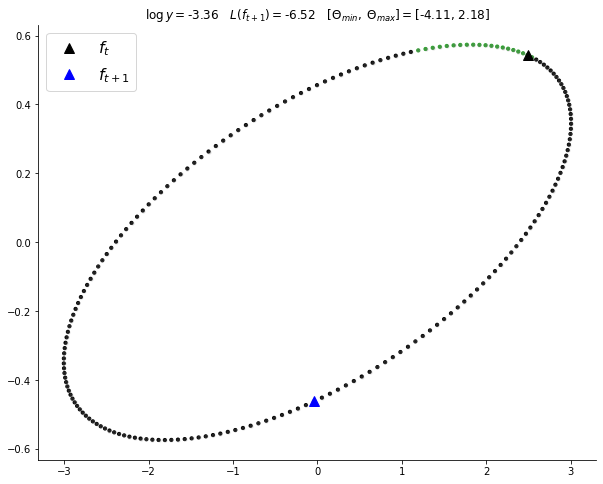

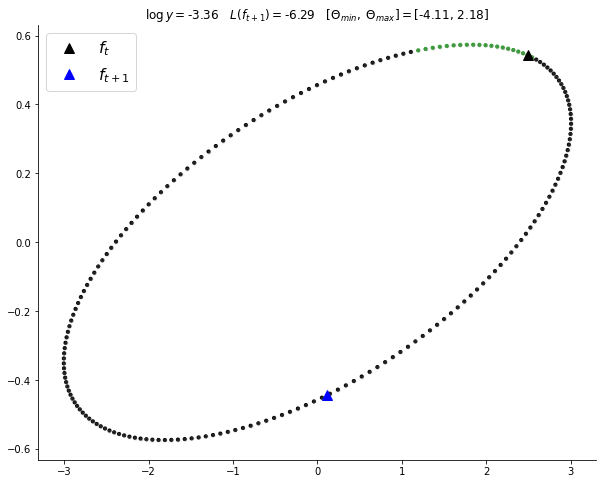

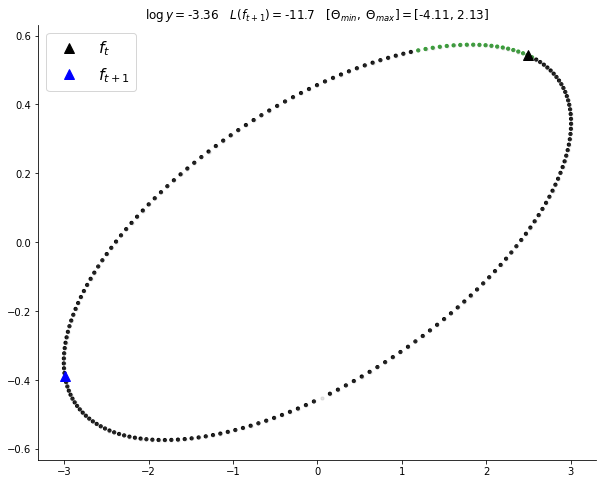

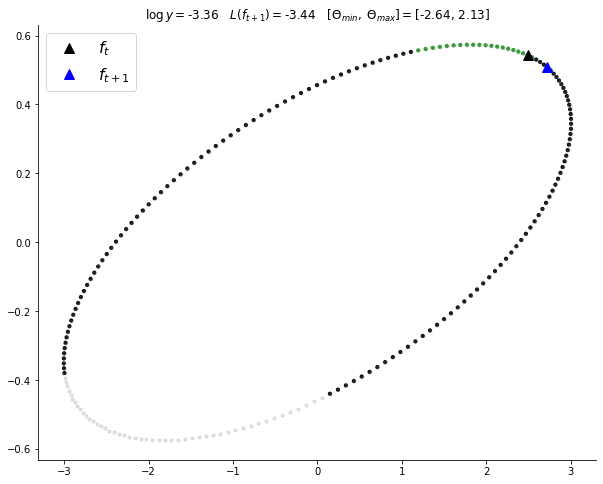

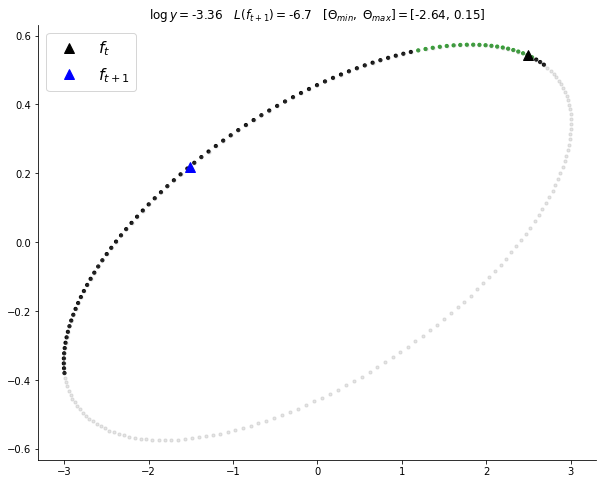

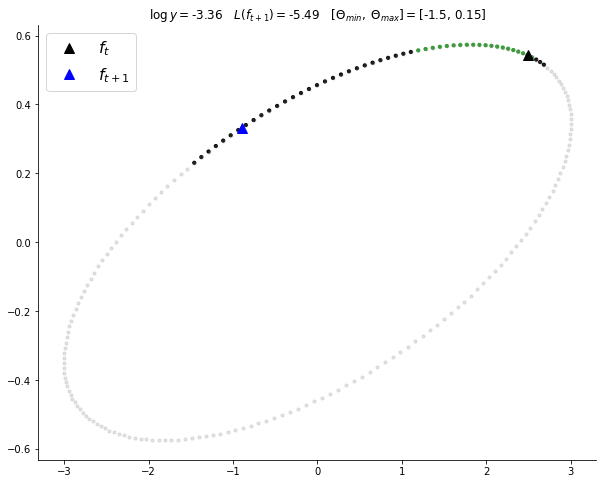

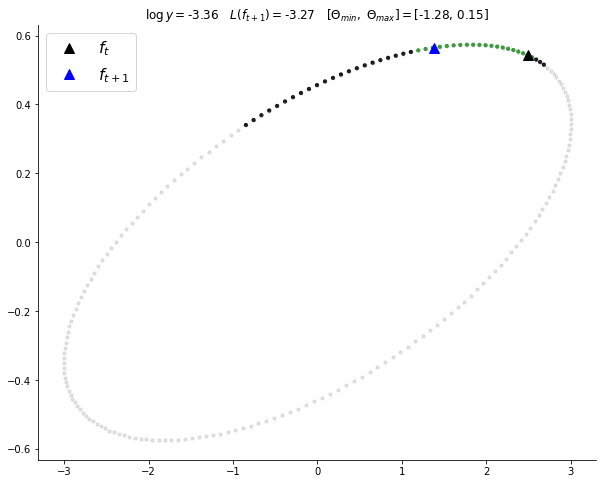

In [5]:
first=True
i = 0
while True:
    i+=1
    # try:
    f_candidate = (f_incumbent * np.cos(Θ) + nu * np.sin(Θ)).squeeze()
    plot_ESS(log_y, f_incumbent, f_candidate, Θ_min, Θ_max, nu, loglik, first=first, save=False, i=i)
    if loglik(f_candidate) > log_y:
        f_incumbent = f_candidate
        break
    elif Θ < 0:
        Θ_min = Θ
    elif Θ > 0:
        Θ_max = Θ
    first=False
    Θ = np.random.uniform(Θ_min, Θ_max)

### Toy Example: GPC

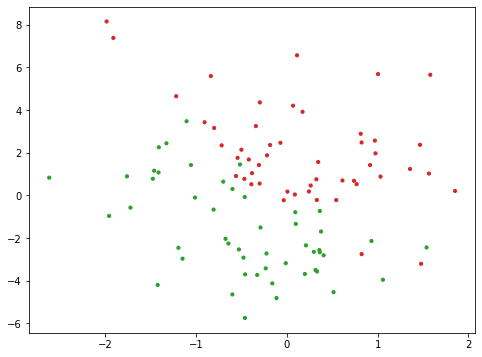

In [8]:
X1 = np.random.standard_normal(size=100)
X2 = np.random.normal(0,3,size=100)
X = np.dstack((X1,X2)).squeeze()
Y = np.where(0.5*X1 + 0.3*X2 + np.random.normal(0,0.2,100) > 0, 1, 0)

fig, ax = plt.subplots(1,1,figsize=(8,6))
plt.scatter(x=X[:,0], y=X[:,1], s=10, c=np.where(Y>0, "tab:red", "tab:green"))

In [9]:
train_X, train_Y = X[:80,:], Y[:80]
test_X, test_Y = X[80:,:], Y[80:]

In [10]:
gpc = GPC(kernel=gaussian_kernel, hyperparameters=[1,1])
gpc.X, gpc.Y = train_X, train_Y

In [11]:
y_pred, var_pred = gpc.predict(test_X)
prob_pred = GPC._sigmoid(y_pred)

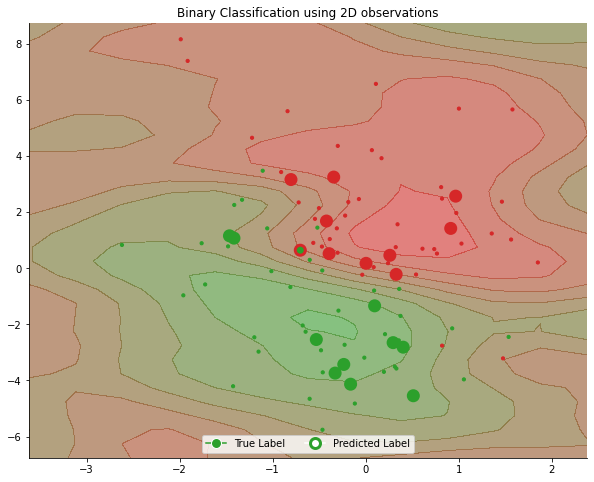

In [13]:
plot_contour(train_X, train_Y, test_X, test_Y, prob_pred, gpc, contour=True)

In [55]:
len(prob_pred)

80